# 21기 Clustering 정규세션 과제

**데이터:** [Mall Customer Segmentation Data| Kaggle](https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python)

---

## 0. 데이터 불러오기

In [2]:
import pandas as pd
df = pd.read_csv("Mall_Customers.csv", index_col = 0)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


## 1. Preprocssing / EDA

In [5]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

In [6]:
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [7]:
df.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [9]:
scaler = StandardScaler()

df_scaled = scaler.fit_transform(df.iloc[:,1:])

## 2. Clustering

In [11]:
df_scaled = pd.DataFrame(df_scaled)
df_scaled.columns = ["Age","Annual Income (k$)","Spending Score (1-100)"]
df_scaled

,Age,Annual Income (k$),Spending Score (1-100)
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980
...,...,...,...
195,-0.276302,2.268791,1.118061
196,0.441365,2.497807,-0.861839
197,-0.491602,2.497807,0.923953
198,-0.491602,2.917671,-1.250054


In [12]:
# clustering 1 
features1 = df[['Age','Annual Income (k$)']]
kmeans1 = KMeans(n_clusters=3, init='k-means++',random_state=42)
kmeans1.fit(features1)

KMeans(n_clusters=3, random_state=42)

In [17]:
# clustering 2
features2 = df[['Annual Income (k$)','Spending Score (1-100)']]
kmeans2 = KMeans(n_clusters=5, init='k-means++',random_state=42)
kmeans2.fit(features2)

KMeans(n_clusters=5, random_state=42)

## 3. Evaluation

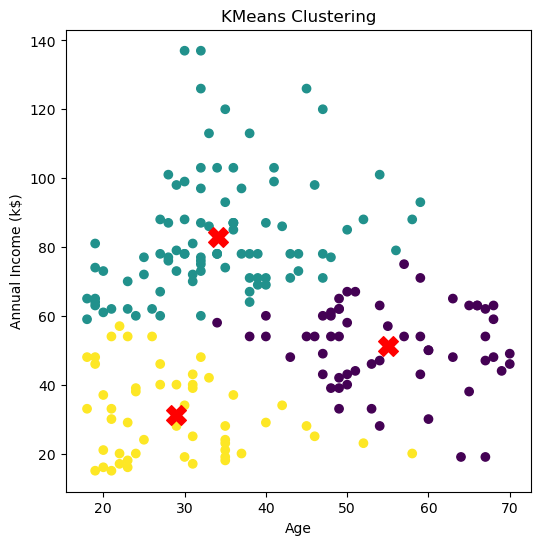

In [14]:
plt.figure(figsize=(6, 6))
plt.scatter(df['Age'], df['Annual Income (k$)'], c=kmeans1.labels_)
plt.scatter(kmeans1.cluster_centers_[:, 0], kmeans1.cluster_centers_[:, 1], marker='X', s=200, color='red')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.title('KMeans Clustering1')
plt.show()

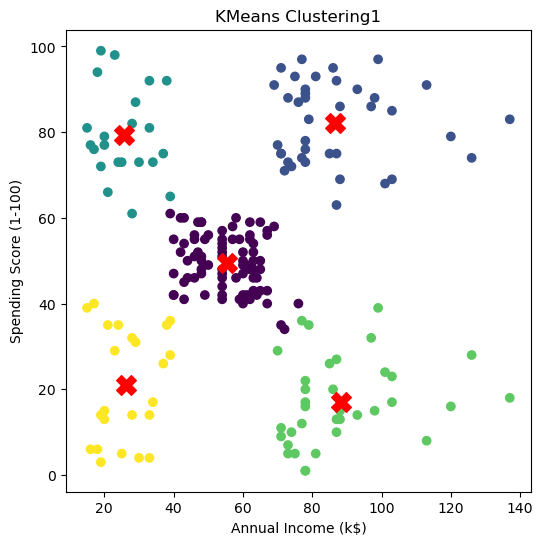

In [18]:
plt.figure(figsize=(6, 6))
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c=kmeans2.labels_)
plt.scatter(kmeans2.cluster_centers_[:, 0], kmeans2.cluster_centers_[:, 1], marker='X', s=200, color='red')
plt.ylabel('Spending Score (1-100)')
plt.xlabel('Annual Income (k$)')
plt.title('KMeans Clustering1')
plt.show()